In [134]:
import numpy as np
import matplotlib.pyplot as plt

In [135]:
from loaders import clean_text_for_pattern_letter
from temp_text_puh import template_str
# input_str = clean_text_for_pattern_letter(template_str, out_len=len(template_str))
input_str = clean_text_for_pattern_letter(template_str, out_len=5000)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
5000
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [136]:
def predict_train(input_str, letters, max_index: int = 4,):
    WIN: dict[str, dict[str, int]] = {}
    HW: dict[str, int] = {}
    W: dict[str, dict[str, dict[int, int]]] = {}

    IDX: list = []

    for letter in letters:
        WIN.setdefault(letter, {})

        for idx in range(max_index):
            WIN[letter].setdefault(idx, 0)
    
    prev_index = 0

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            WIN[inp][prev_index] += 1
            continue
        
        IDX.append(prev_index)

        prev_idx = inp_idx - 1
        prev_inp = input_str[prev_idx]

        key_HW = prev_inp + str(prev_index) + ':' + inp

        inp_min_index = 0
        if HW.get(key_HW, -1) != -1:
            inp_min_index = HW[key_HW]
        else:
            inp_min_index = min(WIN[inp], key=WIN[inp].get)
            WIN[inp][inp_min_index] += 1

            HW.setdefault(key_HW, inp_min_index)

        key_I = prev_inp + str(prev_index)
        W.setdefault(key_I, {})
        W[key_I].setdefault(inp, {})
        W[key_I][inp].setdefault(inp_min_index, 0)
        W[key_I][inp][inp_min_index] += 1

        # recursion
        prev_index = inp_min_index
    
    return W, HW, IDX

max_index_L1 = 32

W, HW, IDX = predict_train(input_str, letters, max_index=max_index_L1)
for wk, wv in W.items():
    print(wk, wv)

c0 {'h': {0: 1}, 'e': {4: 1}}
h0 {'a': {0: 1}, 't': {4: 1}, 'e': {11: 1}, ' ': {17: 2}}
a0 {'p': {0: 1}, 'n': {2: 1}, 't': {13: 2}, 'k': {16: 1}, 's': {23: 1}, 'd': {0: 1}}
p0 {'t': {0: 1}, 'l': {6: 1}}
t0 {'e': {0: 1}, 'o': {31: 2}, 'l': {18: 1}, 'h': {28: 8}, 'r': {28: 1}, ' ': {19: 2}, 'w': {8: 1}}
e0 {'r': {0: 2}, 'n': {20: 2}, 's': {7: 2}, 'd': {1: 1}, ' ': {17: 3}, 't': {2: 1}}
r0 {' ': {0: 4}, 'e': {11: 1}, 's': {24: 1}}
 0 {'i': {0: 5}, 'b': {7: 6}, 'f': {5: 1}, 'h': {31: 8}, 'w': {15: 1}, 'g': {10: 1}, 'a': {21: 7}, 'l': {17: 1}, 'o': {27: 2}, 't': {22: 2}, 'y': {28: 1}}
i0 {'n': {0: 6}, 's': {17: 1}, ' ': {11: 1}, 'k': {17: 1}, 't': {26: 2}}
n0 {' ': {1: 3}, 'a': {25: 1}, 'g': {5: 2}, 'd': {5: 2}, 'n': {15: 1}, 'e': {1: 2}, 'c': {3: 1}, 'k': {23: 1}}
 1 {'w': {0: 2}, 'c': {5: 3}, 'a': {18: 3}, 'n': {0: 1}, 'p': {12: 4}, 's': {9: 2}, 'i': {10: 4}, 't': {12: 5}, 'g': {14: 1}, 'b': {25: 3}, 'l': {23: 1}, 'h': {22: 1}, 'o': {3: 1}, 'm': {26: 1}, 'f': {15: 1}}
w0 {'h': {1: 1}, 'n'

In [137]:
def predict(input_str: str, letters: list, W: dict[str, dict[str, dict[int, int]]], HW: dict[str, int], max_index=4):
    err = 0

    indices = [x for x in range(max_index)]

    for inp_idx, inp in enumerate(input_str[:-1]):
        key_I = inp + str(indices[0])
        O = W.get(key_I, {})

        for index in indices[1:]:
            print(O)
            print()
            key_I = inp + str(index)

            index_O = W.get(key_I, {})

            for key, val in index_O.items():
                O.setdefault(key, {})
                O[key].update(val)

        print(O)
        print()
        max_symbol = 'a'
        max_symbol_index = 0
        max_val = 0
        for key, val in O.items():
            max_index = max(val, key=val.get)
            O[key] = {max_index: val[max_index]}

            if val[max_index] > max_val:
                max_val = val[max_index]
                max_symbol_index = max_index
                max_symbol = key

        print(O)
        print(max_symbol, max_symbol_index, max_val)

        # err
        next_inp = input_str[inp_idx + 1]

        if max_symbol != next_inp:
            err += 1

            index_stats = O.get(next_inp, {0: 0})
            max_symbol_index = list(index_stats.keys())[0]

        # recurtion
        indices = [max_symbol_index]

    return err

err_L1 = predict(input_str, letters, W, HW, max_index=max_index_L1)

print(err_L1, err_L1 / (len(input_str) / 100))

{'h': {0: 1}, 'e': {4: 1}}

{'h': {0: 1, 2: 2}, 'e': {4: 1}}

{'h': {0: 1, 2: 2}, 'e': {4: 1, 3: 1}, 'k': {19: 1}}

{'h': {0: 1, 2: 2, 29: 1}, 'e': {4: 1, 3: 1}, 'k': {19: 1}, 'o': {6: 1}}

{'h': {0: 1, 2: 2, 29: 1, 30: 1}, 'e': {4: 1, 3: 1}, 'k': {19: 1, 0: 1}, 'o': {6: 1}}

{'h': {0: 1, 2: 2, 29: 1, 30: 1, 11: 2}, 'e': {4: 1, 3: 1, 20: 1}, 'k': {19: 1, 0: 1}, 'o': {6: 1, 23: 1}}

{'h': {0: 1, 2: 2, 29: 1, 30: 1, 11: 2}, 'e': {4: 1, 3: 1, 20: 1}, 'k': {19: 1, 0: 1}, 'o': {6: 1, 23: 1, 16: 1}, 'a': {11: 1}, 'l': {0: 1}, 'r': {1: 1}}

{'h': {0: 1, 2: 2, 29: 1, 30: 1, 11: 2}, 'e': {4: 1, 3: 1, 20: 1}, 'k': {19: 1, 0: 1, 21: 1}, 'o': {6: 1, 23: 1, 16: 1, 21: 1}, 'a': {11: 1}, 'l': {0: 1}, 'r': {1: 1}}

{'h': {0: 1, 2: 2, 29: 1, 30: 1, 11: 2, 4: 1}, 'e': {4: 1, 3: 1, 20: 1, 14: 1}, 'k': {19: 1, 0: 1, 21: 1}, 'o': {6: 1, 23: 1, 16: 1, 21: 1}, 'a': {11: 1}, 'l': {0: 1}, 'r': {1: 1}}

{'h': {0: 1, 2: 2, 29: 1, 30: 1, 11: 2, 4: 1}, 'e': {4: 1, 3: 1, 20: 1, 14: 1, 26: 1}, 'k': {19: 1, 0: 1, 21:

In [138]:
def get_TF(input_str: str, W: dict[str, dict[str, int]], IDX: list):
    TF = []

    for inp_idx, inp in enumerate(input_str[:-1]):
        index = IDX[inp_idx]

        key_I = inp + str(index)
        I = W[key_I]

        tf = len(I)

        TF.append(tf)
    
    TF.append(0)

    return TF

TF = get_TF(input_str, W, IDX)
print(TF)

[8, 4, 6, 2, 7, 6, 3, 11, 5, 8, 15, 3, 3, 6, 1, 5, 13, 4, 7, 18, 8, 4, 7, 19, 6, 4, 3, 4, 10, 2, 2, 2, 5, 1, 17, 5, 5, 16, 3, 4, 5, 5, 4, 6, 14, 6, 4, 5, 16, 2, 5, 7, 5, 15, 7, 7, 2, 10, 5, 7, 2, 6, 18, 4, 5, 6, 1, 17, 6, 6, 2, 14, 2, 4, 6, 11, 5, 2, 7, 3, 5, 5, 4, 13, 3, 7, 2, 3, 7, 15, 4, 9, 4, 5, 16, 6, 3, 12, 8, 3, 2, 4, 3, 4, 12, 4, 7, 6, 3, 12, 2, 7, 2, 5, 6, 1, 15, 2, 8, 3, 4, 2, 4, 5, 6, 3, 5, 11, 5, 7, 2, 11, 3, 3, 3, 2, 13, 3, 4, 3, 2, 11, 5, 4, 2, 1, 13, 5, 3, 13, 5, 4, 6, 18, 3, 6, 2, 1, 11, 7, 1, 11, 3, 7, 3, 17, 4, 8, 10, 2, 11, 3, 8, 3, 4, 5, 1, 15, 3, 6, 4, 5, 3, 4, 8, 3, 3, 6, 3, 13, 4, 8, 2, 5, 5, 18, 7, 3, 19, 6, 5, 17, 5, 4, 16, 2, 5, 4, 14, 9, 2, 16, 2, 7, 15, 1, 4, 4, 4, 3, 10, 6, 5, 7, 18, 5, 7, 4, 1, 17, 4, 7, 1, 14, 7, 2, 11, 5, 7, 2, 4, 5, 2, 13, 2, 6, 3, 6, 3, 3, 4, 6, 3, 6, 15, 3, 4, 6, 16, 2, 8, 2, 5, 3, 5, 2, 5, 4, 12, 4, 9, 12, 3, 6, 5, 4, 2, 12, 4, 4, 5, 5, 15, 5, 4, 4, 2, 7, 11, 5, 6, 5, 4, 5, 1, 11, 7, 5, 13, 7, 3, 5, 5, 3, 7, 3, 11, 3, 7, 1, 13, 6, 2,

In [139]:
def get_word_stats(input_str: str | list, TF: list, ):
    buffer: list = [input_str[0]]
    WordStats: dict[str, int] = {}

    prev_tf = TF[0]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            continue

        if TF[inp_idx] - prev_tf > 0.0: # and abs(TF[inp_idx] - prev_tf) > 0.2:
            word = ''.join(buffer)

            WordStats.setdefault(word, 0)
            WordStats[word] += 1

            buffer = [inp]
            prev_tf = TF[inp_idx]
            
            continue

        buffer.append(inp)
        prev_tf = TF[inp_idx]
    
    # sort
    WordStats = dict(sorted(WordStats.items(), key=lambda item: item[1], reverse=True))

    return WordStats

WordStats_L1 = get_word_stats(input_str=input_str, TF=TF)
print(len(WordStats_L1))
mean_WS = np.mean(np.array(list(WordStats_L1.values())))
print(f'{mean_WS=}')
WS_len = 0
for key, val in WordStats_L1.items():
    if len(key.strip()) > 1 and val >= mean_WS:
        WS_len += 1
    print(key, val)
print(f'{WS_len=}')

377
mean_WS=6.204244031830239
e 183
 h 77
o 67
 th 59
 t 59
 b 57
 s 50
 w 49
h 47
 a 46
t 41
i 37
 i 36
n 35
er 35
 and 34
 c 30
 f 30
ou 29
 d 27
 y 27
 p 26
ed 25
 of 25
 l 24
es 23
 r 23
s 22
at 20
ng 19
 m 19
 g 19
l 19
om 18
r 17
 n 17
ing 17
or 16
nd 16
en 16
ow 15
a 15
u 15
aid 15
 it 14
 o 14
im 13
is 12
ob 12
 as 12
as 12
id 11
et 10
 to 9
 is 9
ad 9
ar 8
 if 8
ee 8
oh 7
 j 7
 v 7
 st 6
hr 6
ay 6
 an 6
oth 6
op 6
 at 6
ot 6
ooh 6
 his 6
ik 6
 ab 6
hat 6
elf 6
 all 6
 wh 5
ns 5
ir 5
ly 5
n' 5
th 5
ie 5
am 5
 in 5
ery 5
 tr 5
ak 5
uzz 5
ong 5
on 5
eg 4
in 4
 k 4
 bu 4
oug 4
ht 4
 ' 4
 q 4
ec 4
toph 4
out 4
 by 4
it 4
 sa 4
 gr 4
ac 4
 buz 4
z 4
 cl 4
imb 4
b 4
us 4
 br 4
ty 4
all 4
 ar 3
 int 3
nni 3
ear 3
 bump 3
eh 3
nly 3
ould 3
ent 3
nk 3
ere 3
irst 3
oi 3
 said 3
al 3
e' 3
ick 3
oo 3
an 3
ory 3
hris 3
ne 3
os 3
 oh 3
 up 3
inn 3
iv 3
ois 3
ink 3
 him 3
 only 3
eas 3
ei 3
ney 3
 had 3
el 3
anc 3
ef 3
ig 3
ch 2
oph 2
eels 2
eal 2
hi 2
 that 2
od 2
inni 2
 nam 2
ist 2
on' 2
n

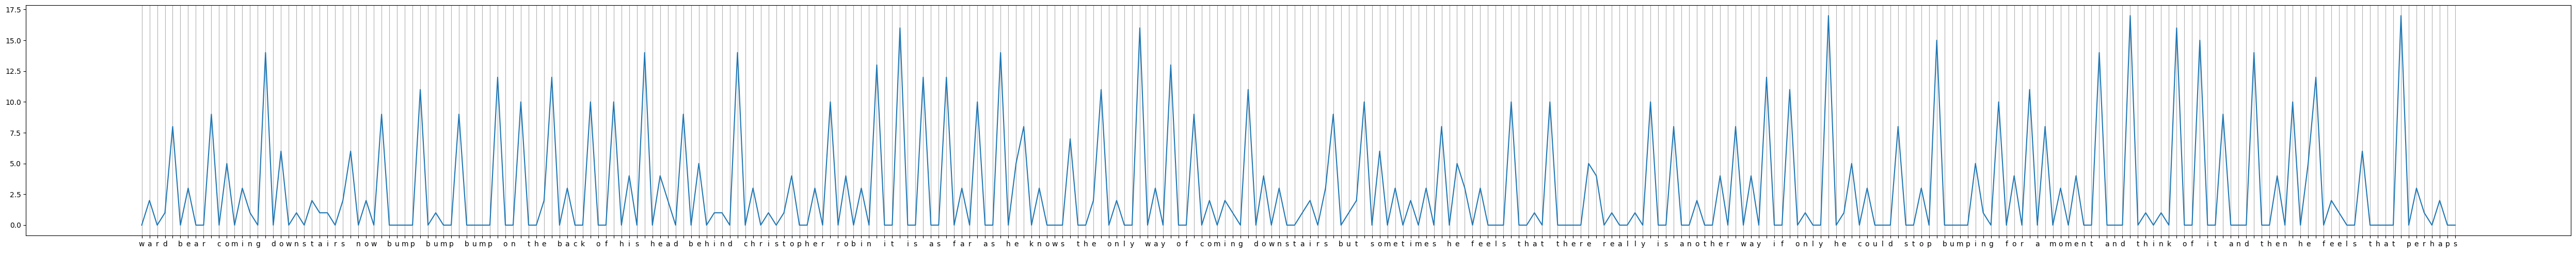

In [140]:
begin = 100
length = 400

arr_TF = np.array(TF, dtype=float)

arr_TF = np.pad(arr_TF, (1, 0))[:-1] - arr_TF
arr_TF[arr_TF > 0] = 0
arr_TF = np.abs(arr_TF)

arr_TF = arr_TF[begin:length]

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
axs.plot(np.arange(arr_TF.size), arr_TF)
axs.xaxis.set_ticks(np.arange(len(input_str[begin:length])) ,input_str[begin:length])
axs.xaxis.grid(True)

plt.show()

In [141]:
from collections import Counter


def predict(input_str, TF: list, StatsDict: dict, index_by_prev: dict, max_index, err=0,):
    indexes = [x for x in range(1, max_index+1)]

    output = []

    for inp_idx, inp in enumerate(input_str):
        if inp_idx == len(input_str) - 1:
            continue

        all_indexes_prd_symbols = Counter({})
        prd_symbols_per_index = []

        for index in indexes:
            stats_key = inp + str(index)
            prd_symbols = StatsDict.get(stats_key)

            if not prd_symbols:
                print(f'not prd_symbol: {inp=} {index=} {prd_symbols=}')
                continue

            print(f'{inp=} {index=} {prd_symbols=}')
            all_indexes_prd_symbols += Counter(prd_symbols)
            prd_symbols_per_index.append(prd_symbols)

        print(f'{all_indexes_prd_symbols=}')
        stl = np.array(list(all_indexes_prd_symbols.values()))
        # tf = len(list(all_indexes_prd_symbols.keys()))
        tf = np.sum(np.abs(stl - stl[np.newaxis].T))

        TF.append(tf)

        prd_symbol = max(all_indexes_prd_symbols, key=all_indexes_prd_symbols.get)
        prd_symbol_stats = all_indexes_prd_symbols[prd_symbol]

        next_inp = input_str[inp_idx + 1]
        print(f'{inp_idx=} {inp=} | {prd_symbol=} {next_inp=} {prd_symbol_stats=}')

        if prd_symbol != next_inp:
            err += 1

        output.append(prd_symbol)

        prev_indexes = []
        for idx, prd_symbols in enumerate(prd_symbols_per_index):
            if prd_symbols.__contains__(next_inp):
                prev_indexes.append(idx + 1)

        print(f'{prev_indexes=}')

        # recurtion
        indexes = []
        for prev_index in prev_indexes:
            by_prev_key = inp + str(prev_index) + ':' + next_inp
            next_index = index_by_prev.get(by_prev_key)

            if not next_index:
                continue
            
            print(f'{next_index}')
            indexes.extend(list(next_index.keys()))

        indexes = list(set(indexes))
        print('next indexes', indexes)
        
        if len(indexes) <= 0:
            indexes = [x for x in range(1, max_index+1)]

        print()
        
    output.insert(0, input_str[0])

    return TF, err, output


In [142]:
# predict
TF = []

TF, err, out_L1 = predict(input_str=input_str, TF=TF, StatsDict=StatsDict, index_by_prev=index_by_prev_L1, max_index=max_index_L1)

print(err, err / (len(input_str) / 100) )

NameError: name 'StatsDict' is not defined